In [20]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
def plot(pth):
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])
    ood_score = df.score
    print(ood_score.min(), ood_score.max())
    plt.hexbin(data_x, data_y, C = ood_score)
#     plt.xlim(-5, 8)
#     plt.ylim(-6, 8)
#     plt.xlim(-8, 10)
#     plt.ylim(-8, 10)
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.show()
    
def plot_m(pth):
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])

    ood_score = df.score.apply(lambda x: np.log10(-x))
    print(ood_score.min(), ood_score.max())
    
    plt.hexbin(data_x, data_y, C = ood_score)
#     plt.colorbar()
#     plt.xlim(-5, 8)
#     plt.ylim(-6, 8)
    plt.xlim(-8, 10)
    plt.ylim(-8, 10)
    plt.show()
    
def plot_odin_m(pth):
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])

    ood_score = df.score
    
    print(ood_score.min(), ood_score.max())
    
    plt.hexbin(data_x, data_y, C = np.round(ood_score, 0))
#     plt.clim(0.15, 0.2)
#     plt.colorbar()
    plt.xlim(-5, 8)
    plt.ylim(-6, 8)
    plt.show()
    

def plot_round(pth):
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])

    ood_score = df.score.apply(lambda x: np.round(-np.log10(-x), 0))
    
    plt.hexbin(data_x, data_y, C = ood_score)
#     plt.colorbar()
#     plt.xlim(-5, 8)
#     plt.ylim(-6, 8)
    plt.xlim(-8, 10)
    plt.ylim(-8, 10)
    plt.show()
    
def plot_minmax(pth, pth_train, title=None):
#     plt.figure(figsize=(8, 6))
    with open(pth_train, 'rb') as f:
        df_train = pd.DataFrame(pickle.load(f))
    min_score = df_train.score.min()
    max_score = df_train.score.max()
    
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])
    ood_score = df.score.apply(lambda x: 0.5 if (x<min_score) else 1)

    plt.hexbin(data_x, data_y, C = ood_score)
#     plt.clim(min_score, max_score)
#     plt.colorbar()
#     plt.show()
    plt.xlim(-5, 8)
    plt.ylim(-6, 8)
    
    dir_path = os.path.join("./result_images/")
    os.makedirs(dir_path, exist_ok=True)
#     file_path = os.path.join(dir_path, title+".png")
#     plt.savefig(file_path)
    plt.show()

In [21]:
def plot_w_samples(pth, data_dict, title):
    plt.figure(figsize=(8,5))
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])
    ood_score = df.score
    print(ood_score.min(), ood_score.max())
    
    plt.hexbin(data_x, data_y, C = ood_score)
    plt.colorbar(pad = 0.02)
    plt.scatter(data_dict['X']['train'][:, 0], data_dict['X']['train'][:, 1], s=20, color='orangered', alpha= 0.5)
    
#     plt.xlim(-5, 8)
#     plt.ylim(-6, 8)
#     plt.colorbar()
    plt.xlim(-10, 25)
    plt.ylim(-10, 25)
    plt.gca().set_aspect('equal')
#     plt.show()
    
    dir_path = os.path.join("./result_imgs_iclr/")
    os.makedirs(dir_path, exist_ok=True)
    file_path = os.path.join(dir_path, title+".png")
    plt.savefig(file_path)
    
def plot_round_w_samples(pth, data_dict, title):
    plt.figure(figsize=(8,5))
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])

#     print(df.score)
    print("mahala dis", df.score.min(), df.score.max())
    ood_score = df.score.apply(lambda x: np.round(-np.log10(-x + 1e-8), 0))
    print("mahala dis after log", ood_score.min(), ood_score.max())
    plt.hexbin(data_x, data_y, C = ood_score)
    plt.colorbar(pad = 0.02)
    plt.scatter(data_dict['X']['train'][:, 0], data_dict['X']['train'][:, 1], s=20, color='orangered', alpha= 0.5)
    
#     plt.xlim(-5, 8)
#     plt.ylim(-6, 8)
    plt.xlim(-10, 25)
    plt.ylim(-10, 25)
    plt.gca().set_aspect('equal')
#     plt.show()
    
    dir_path = os.path.join("./result_imgs_iclr/")
    os.makedirs(dir_path, exist_ok=True)
    file_path = os.path.join(dir_path, title+".png")
    plt.savefig(file_path)
    
    
    
def plot_m_w_samples(pth, data_dict, title):
    plt.figure(figsize=(8,5))
    with open(pth, 'rb') as f:
        df = pd.DataFrame(pickle.load(f))
    data_x = df.data.apply(lambda x: x[0])
    data_y = df.data.apply(lambda x: x[1])
    print("mahala dis", df.score.min(), df.score.max())
    ood_score = df.score.apply(lambda x: (-np.log10(-x)))
    print("mahala dis after log", ood_score.min(), ood_score.max())
    
    plt.hexbin(data_x, data_y, C = ood_score)
    plt.colorbar(pad = 0.02)
    plt.scatter(data_dict['X']['train'][:, 0], data_dict['X']['train'][:, 1], s=20, color='orangered', alpha= 0.5)
    
#     plt.xlim(-5, 8)
#     plt.ylim(-6, 8)
    plt.xlim(-10, 25)
    plt.ylim(-10, 25)
    plt.gca().set_aspect('equal')
#     plt.show()    
    
    dir_path = os.path.join("./result_imgs_iclr/")
    os.makedirs(dir_path, exist_ok=True)
    file_path = os.path.join(dir_path, title+".png")
    plt.savefig(file_path)

0.5000031590461731 1.0
0.5000525116920471 0.5247829556465149
mahala dis -6609.4169921875 -0.05875276029109955
mahala dis after log -4.0 1.0
mahala dis -6609.4169921875 -0.05875276029109955
mahala dis after log -3.820163152641066 1.2309717247833354


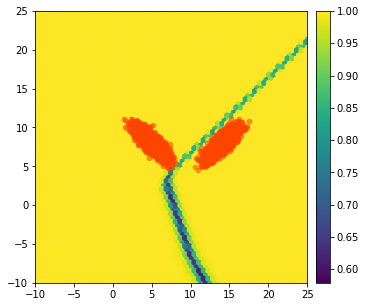

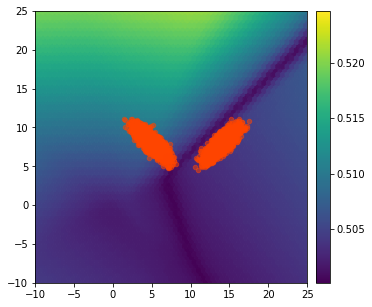

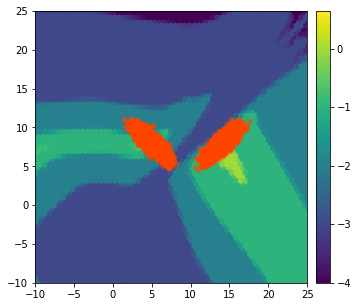

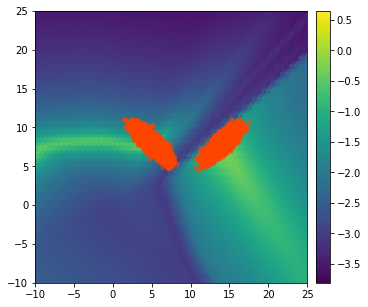

In [22]:
save_path = os.path.join('./data', "iddata_2d_ellipse_binary.pkl")
with open(save_path, 'rb') as f:
    data_dict = pickle.load(f)

pth = "./results/ce/ellipse_binary/scores/baseline/scores.pkl"
# plot(pth)
plot_w_samples(pth, data_dict, title ="ce_msp")
pth = "./results/ce/ellipse_binary/scores/odin/scores.pkl"
# plot(pth)
plot_w_samples(pth, data_dict, title ="ce_odin")
# plot_odin_m(pth)
pth = "./results/ce/ellipse_binary/scores/mahalanobis/scores.pkl"
# plot_m(pth)
# plot(pth)
# plot_round(pth)
plot_round_w_samples(pth, data_dict, title ="ce_mahala_round")
plot_m_w_samples(pth, data_dict, title ="ce_mahala_no_round")
# pth_train = "./results/ce/multicircle_10dim/scores/mahalanobis/scores(train).pkl"
# plot_minmax(pth, pth_train, title = 'm_nahala')